<a href="https://colab.research.google.com/github/Zaernsn/DeepLearning/blob/main/TrainedMNISTData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U fastai 

     |████████████████████████████████| 194kB 18.6MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 61kB 289kB/s 
     |████████████████████████████████| 12.8MB 214kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
import os 
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [16]:
from tempfile import TemporaryDirectory
config_file = Path("~/.fastai/config.yml").expanduser()
if config_file.exists(): os.remove(config_file)
assert not config_file.exists()

config = Config()
assert config_file.exists()

In [17]:
test_eq(untar_data(URLs.MNIST_SAMPLE), config.data/'mnist_sample')

with TemporaryDirectory() as d:
    d = Path(d)
    untar_data(URLs.MNIST_TINY, fname='mnist_tiny.tgz', dest=d, force_download=True)
    Path('mnist_tiny.tgz').rename('nims_tini.tgz')
    p = Path('nims_tini.tgz')
    dest = Path('nims_tini')
    assert p.exists()
    file_extract(p, dest.parent)
    rename_extracted(dest)
    p.unlink()
    shutil.rmtree(dest)

#Test c_key
tst_model = config.model/'mnist_sample'
test_eq(untar_data(URLs.MNIST_SAMPLE, c_key='model'), tst_model)
assert not tst_model.with_suffix('.tgz').exists() #Archive wasn't downloaded in the models path
assert (config.archive/'mnist_sample.tgz').exists() #Archive was downloaded there
shutil.rmtree(tst_model)

In [7]:
handwritting = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = handwritting.dataloaders('/root/.fastai/data/mnist_png/training')

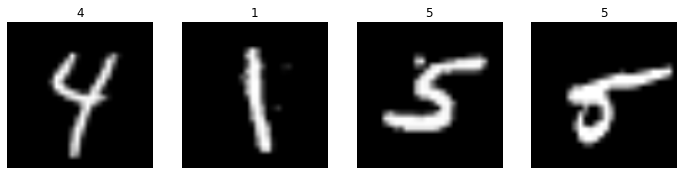

In [9]:
dls.show_batch(max_n=4,nrows=1)

Trainieren des Learners

In [10]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.214949,5.706907,0.859417,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.058388,3.837220,0.886083,01:35
1,0.045007,2.933093,0.825667,01:36
2,0.015723,2.440872,0.786583,01:36
3,0.004260,2.299982,0.734750,01:35


In [11]:
learn.export('handwritting_classifier.pkl')

In [12]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('handwritting_classifier.pkl')]

In [13]:
!cp /content/handwritting_classifier.pkl /content/drive/MyDrive/